In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.io import loadmat
from sklearn import preprocessing

In [2]:
data = loadmat('.\p5\ex5data1.mat')
X, y, Xtest, ytest, Xval, yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']

In [3]:
X

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

In [3]:
X1 = np.hstack([np.ones([X.shape[0],1]),X])

In [4]:
theta = np.ones(X1.shape[1])

In [5]:
def coste_rl(Xs, yv, theta, reg):
    m = len(Xs)
    H = (np.matmul(Xs,theta) - yv.T)**2
    sumatorio_reg = (reg/(2*m)) * np.sum(theta[1:]**2)
    coste = (1/(2*m)) * sum(H[0]) + sumatorio_reg
    return coste

In [6]:
coste_rl(X1, y, theta, 1)

303.9931922202643

In [7]:
def gradiente_rl(Xs, yv, theta, reg):
    m = len(Xs)
    H = (np.matmul(Xs,theta) - yv.T)
    j0 = ((1/m) *  sum(H.T * Xs[0]))
    jn_1 = ((1/m) *  sum(H.T * Xs)) + (reg/m)*theta
    return np.append(j0[0], jn_1[1:])

In [8]:
gradiente_rl(X1,y,theta,1)

array([-15.30301567, 598.25074417])

In [9]:
def regresion_linear_regularizada(theta, X, yv, reg):
    """
    Devuelve el valor del coste y del gradiente aplicando regresion linear regularizada 
    sobre el conjunto de datos con entrada X y salida y 
    X     -- entrada conjunto de datos
    y     -- salida conjunto de datos
    theta -- vector de parametros theta
    reg   -- valor de regularizacion
    """
    coste = coste_rl(X,yv,theta,reg)
    gradiente = gradiente_rl(X,yv,theta,reg)
    
    return coste, gradiente

In [10]:
regresion_linear_regularizada(theta, X1, y, 1)

(303.9931922202643, array([-15.30301567, 598.25074417]))

In [11]:
tmin = opt.minimize(fun=regresion_linear_regularizada, x0=theta, args=(X1, y, 0),method='TNC',jac=True,options={'maxiter' : 70})

In [12]:
tmin

     fun: 22.373906495108947
     jac: array([ 2.61044255e-07, -1.38713461e-08])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 9
     nit: 4
  status: 1
 success: True
       x: array([13.08790378,  0.36777923])

In [13]:
def h0(teta0,teta1,x):
    return teta0 + teta1*x

In [83]:
h0(tmin['x'][0],tmin['x'][1],X)

array([[ 7.22669512],
       [ 2.36604349],
       [26.39766816],
       [26.87675162],
       [-4.58713558],
       [ 9.79942125],
       [18.71779208],
       [ 0.32366002],
       [13.59880591],
       [-3.2355213 ],
       [15.66732418],
       [21.45957008]])

<Figure size 432x288 with 0 Axes>

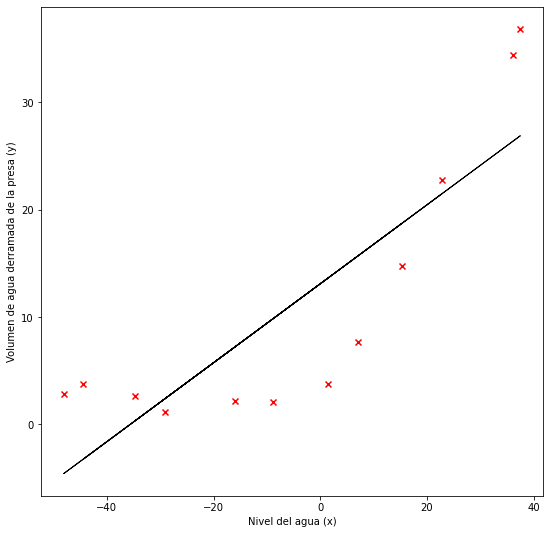

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.scatter(X[:],y[:],c='red',marker="x")
plt.plot(X,h0(tmin['x'][0],tmin['x'][1],X), c='black',linewidth=1)
plt.xlabel('Nivel del agua (x)')
plt.ylabel('Volumen de agua derramada de la presa (y)')
plt.show()
plt.savefig('p5Fig1.png')

## Curvas de aprendizaje

In [15]:
the_ca = []
error_t = []
error_cv = []
Xval1 = np.hstack([np.ones([Xval.shape[0],1]),Xval])
for i in range(len(X)):
    subconjunto_x = X1[0:i+1]
    subconjunto_y = y[0:i+1]
    tmin = opt.minimize(fun=regresion_linear_regularizada, x0=theta, args=(subconjunto_x, subconjunto_y, 0),method='TNC',jac=True,options={'maxiter' : 70})
    the_ca.append(tmin['x'])
    error_t.append(coste_rl(subconjunto_x, subconjunto_y, the_ca[i], 0))
    error_cv.append(coste_rl(Xval1, yval, the_ca[i], 0))

In [17]:
the_ca

[array([ 1.06695055, -0.06697472]),
 array([3.29319568, 0.07271775]),
 array([14.15499028,  0.53912266]),
 array([14.62429824,  0.55985727]),
 array([17.21375957,  0.44974975]),
 array([15.40485121,  0.45741711]),
 array([14.26678031,  0.4368173 ]),
 array([14.62344002,  0.42312838]),
 array([13.29661008,  0.41299409]),
 array([13.85366366,  0.37780979]),
 array([12.93724128,  0.36342987]),
 array([13.08790378,  0.36777923])]

In [18]:
error_t

[8.631534185484672e-18,
 8.371044654825317e-18,
 3.286595045501339,
 2.842677689399798,
 13.15404880911494,
 19.443962512495474,
 20.098521655088906,
 18.172858695200027,
 22.60940542495472,
 23.261461592612033,
 24.31724958804419,
 22.373906495108947]

In [19]:
error_cv

[169.87070840820135,
 110.3003658450425,
 45.010231234641175,
 48.36891147269707,
 35.86516420888284,
 33.829961749819155,
 31.970985730857027,
 30.86244629494908,
 31.13599805614193,
 28.93620722435191,
 29.551431975377273,
 29.433817800893944]

<Figure size 432x288 with 0 Axes>

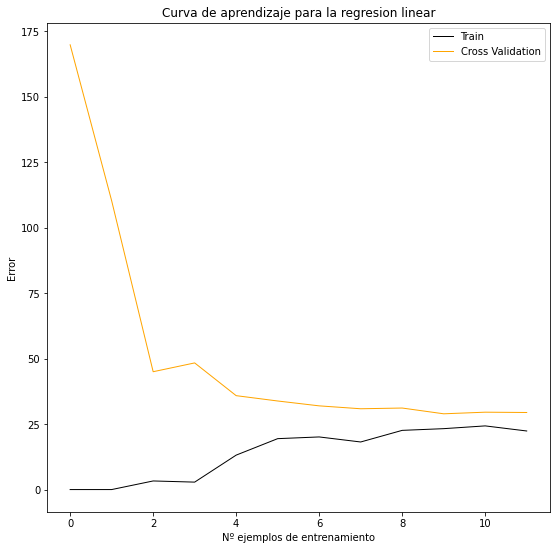

<Figure size 432x288 with 0 Axes>

In [16]:
subconjuntos = np.arange(0,12)
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.plot(subconjuntos,error_t, c='black',linewidth=1,label='Train')
plt.plot(subconjuntos,error_cv, c='orange',linewidth=1,label='Cross Validation')
plt.xlabel('Nº ejemplos de entrenamiento')
plt.ylabel('Error')
plt.title('Curva de aprendizaje para la regresion linear')
plt.legend(loc=1)
plt.show()
plt.savefig('p5Fig2.png')

## Regresion polinomial

In [17]:
def matriz_exponentes(mat, p):
    base = mat
    for i in range(1,p):
        nueva = base**(i+1)
        mat = np.hstack((mat, nueva))
    return mat

In [18]:
def normaliza_matriz_np(mat):
    medias = []
    dev_estandar = []
    matriz = np.zeros(mat.shape)
    for i in range(mat.shape[1]):
        medias.append(np.mean(mat[:,i]))
        dev_estandar.append(np.std(mat[:,i]))
        matriz[:,i] = (mat[:,i] - np.mean(mat[:,i])) / np.std(mat[:,i])
    return matriz, np.array(medias), np.array(dev_estandar)

----------------

In [26]:
k = np.array([[1],[2],[3],[4]])

In [27]:
me = matriz_exponentes(k,5)

In [32]:
me

array([[   1,    1,    1,    1,    1],
       [   2,    4,    8,   16,   32],
       [   3,    9,   27,   81,  243],
       [   4,   16,   64,  256, 1024]])

In [38]:
(me[:,1] - np.mean(me[:,1]))/np.std(me[:,1])

array([-1.14458618, -0.61631563,  0.26413527,  1.49676654])

In [39]:
preprocessing.scale(me[:,1])

array([-1.14458618, -0.61631563,  0.26413527,  1.49676654])

In [108]:
normaliza_matriz_np(me)

(array([[-1.34164079, -1.14458618, -0.98184354, -0.86400002, -0.78228585],
        [-0.4472136 , -0.61631563, -0.69547251, -0.71588573, -0.70743751],
        [ 0.4472136 ,  0.26413527,  0.08182029, -0.07405714, -0.19798592],
        [ 1.34164079,  1.49676654,  1.59549575,  1.6539429 ,  1.68770928]]),
 array([  2.5,   7.5,  25. ,  88.5, 325. ]),
 array([  1.11803399,   5.67890835,  24.44381312, 101.2731455 ,
        414.17085846]))

--------------

In [20]:
matriz_entrada = matriz_exponentes(X,8)

In [21]:
matriz_entrada, vector_medias, vector_desviacion = normaliza_matriz_np(matriz_entrada)

In [22]:
matriz_entrada

array([[-3.78243704e-01, -7.88662325e-01,  1.90328720e-01,
        -7.37591303e-01,  3.20251970e-01, -6.17151602e-01,
         3.59835014e-01, -5.31091256e-01],
       [-8.38920100e-01,  1.31420204e-03, -2.58961742e-01,
        -3.41564822e-01,  9.75492734e-02, -4.55196644e-01,
         2.66773432e-01, -4.68873807e-01],
       [ 1.43871736e+00,  6.10831582e-01,  1.30534069e+00,
         2.56220001e-01,  1.02186338e+00, -1.26962121e-02,
         7.90210009e-01, -1.77926980e-01],
       [ 1.48412330e+00,  7.38068463e-01,  1.42031240e+00,
         4.13121830e-01,  1.15534830e+00,  1.31223708e-01,
         9.10700224e-01, -6.22895388e-02],
       [-1.49791929e+00,  1.93643966e+00, -2.12774745e+00,
         2.43510061e+00, -2.51876748e+00,  2.71792174e+00,
        -2.76331690e+00,  2.88908182e+00],
       [-1.34409278e-01, -1.01936614e+00,  2.62563148e-01,
        -7.72577738e-01,  3.31046537e-01, -6.21453712e-01,
         3.61188658e-01, -5.31586524e-01],
       [ 7.10844248e-01, -8.147136

In [47]:
p,q = regresion_linear_regularizada(theta,matriz_entrada1,y,0)

In [49]:
q = q.reshape(-1,1)

In [52]:
q

array([[-10.21758933],
       [ -9.02356739],
       [ -0.43668793],
       [ -7.64073489],
       [  1.13604641],
       [ -6.32800778],
       [  2.11358063],
       [ -5.34594533],
       [  2.68928726]])

In [23]:
matriz_entrada1 = np.hstack([np.ones([matriz_entrada.shape[0],1]),matriz_entrada])

In [44]:
matriz_entrada[:,0]

array([-0.3782437 , -0.8389201 ,  1.43871736,  1.4841233 , -1.49791929,
       -0.13440928,  0.71084425, -1.03249041,  0.22568376, -1.36981778,
        0.42173105,  0.97070085])

In [75]:
matriz_entrada1[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
theta = np.ones(matriz_entrada1.shape[1])

In [25]:
tmin = opt.minimize(fun=regresion_linear_regularizada, x0=theta, args=(matriz_entrada1, y, 0),method='TNC',jac=True,options={'maxiter' : 70})

In [26]:
tmin

     fun: 0.05103334201537832
     jac: array([-0.00026556,  0.00308108, -0.00290513,  0.00388942, -0.00778646,
        0.00581994, -0.00588682,  0.00399002, -0.00316407])
 message: 'Max. number of function evaluations reached'
    nfev: 70
     nit: 16
  status: 3
 success: False
       x: array([ 11.21732377,  10.78543449,  21.14954951,  14.58538036,
       -43.80900131, -38.93934252,  41.41683104,  33.5490928 ,
        -4.65389177])

In [27]:
def h0_multivariable(tetas,xs):
    return(np.dot(xs[:,:],tetas[:]))

In [28]:
ar = h0_multivariable(tmin['x'],matriz_entrada1)

In [29]:
ar

array([ 2.0600181 ,  1.86434653, 34.48983353, 36.74081785,  2.79771419,
        1.84608926, 15.15519922,  2.07724862,  3.90807918,  3.78294022,
        7.38617516, 22.49942335])

In [57]:
er = h0_multivariable(q,matriz_entrada1)

In [58]:
er

array([[-15.43514359],
       [ -5.32396656],
       [-44.34548965],
       [-46.38465564],
       [ 65.70274691],
       [-18.21229411],
       [-26.66891174],
       [  3.96430735],
       [-21.5441082 ],
       [ 39.7842507 ],
       [-23.39669538],
       [-30.75111202]])

<Figure size 432x288 with 0 Axes>

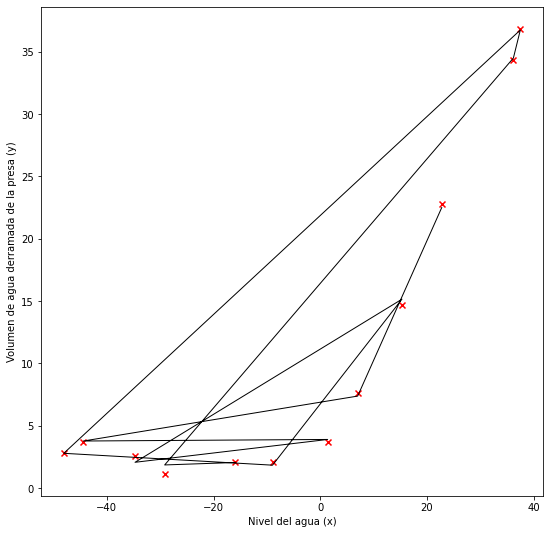

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.scatter(X[:],y[:],c='red',marker="x")
plt.plot(X,ar, c='black',linewidth=1)
plt.xlabel('Nivel del agua (x)')
plt.ylabel('Volumen de agua derramada de la presa (y)')
plt.show()
plt.savefig('p5Fig3a.png')

<Figure size 432x288 with 0 Axes>

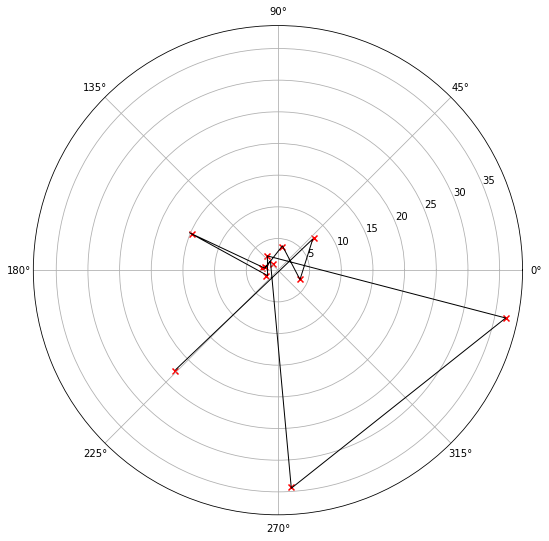

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.axes(projection = 'polar')
plt.scatter(X[:],y[:],c='red',marker="x")
plt.plot(X,ar, c='black',linewidth=1)
#plt.xlabel('Nivel del agua')
#plt.ylabel('Volumen de agua derramada de la presa')
plt.show()
plt.savefig('p5Fi3b.png')

In [112]:
y

array([[ 2.13431051],
       [ 1.17325668],
       [34.35910918],
       [36.83795516],
       [ 2.80896507],
       [ 2.12107248],
       [14.71026831],
       [ 2.61418439],
       [ 3.74017167],
       [ 3.73169131],
       [ 7.62765885],
       [22.7524283 ]])

In [76]:
len(h0_multivariable(tmin['x'],matriz_entrada1))

12

In [77]:
lin_esp = np.arange(min(X),max(X),0.05)

In [78]:
lin_esp

array([-48.05882945, -48.00882945, -47.95882945, ...,  37.39117055,
        37.44117055,  37.49117055])

## Curvas de aprendizaje

In [15]:
Xval

array([[-16.74653578],
       [-14.57747075],
       [ 34.51575866],
       [-47.01007574],
       [ 36.97511905],
       [-40.68611002],
       [ -4.47201098],
       [ 26.53363489],
       [-42.7976831 ],
       [ 25.37409938],
       [-31.10955398],
       [ 27.31176864],
       [ -3.26386201],
       [ -1.81827649],
       [-40.7196624 ],
       [-50.01324365],
       [-17.41177155],
       [  3.5881937 ],
       [  7.08548026],
       [ 46.28236902],
       [ 14.61228909]])

In [32]:
Xval_exp = matriz_exponentes(Xval,8)

In [33]:
Xval_norm, Xvm, Xvstd = normaliza_matriz_np(Xval_exp)

In [34]:
the_ca = []
error_t = []
error_cv = []
Xval1 = np.hstack([np.ones([Xval_norm.shape[0],1]),Xval_norm])
for i in range(len(matriz_entrada)):
    subconjunto_x = matriz_entrada1[0:i+1]
    subconjunto_y = y[0:i+1]
    tmin = opt.minimize(fun=regresion_linear_regularizada, x0=theta, args=(subconjunto_x, subconjunto_y, 0),method='TNC',jac=True,options={'maxiter' : 50})
    the_ca.append(tmin['x'])
    error_t.append(coste_rl(subconjunto_x, subconjunto_y, the_ca[i], 0))
    error_cv.append(coste_rl(Xval1, yval, the_ca[i], 0))

In [68]:
the_ca

[array([2.02355829, 0.61284552, 0.19275814, 1.19481254, 0.24503231,
        1.32779656, 0.36830936, 1.36831211, 0.45639714]),
 array([2.00378225, 0.64806514, 0.1607866 , 1.21810246, 0.23577234,
        1.33487321, 0.37076211, 1.36679967, 0.46315362]),
 array([ 6.55748498,  5.37357619,  5.52389034,  5.46137149,  2.66111978,
         5.12692776,  0.80354266,  4.58860321, -0.17332779]),
 array([ 5.93369351,  6.7891397 ,  6.87544251,  5.49619824,  1.90719569,
         4.05617904, -1.41578409,  2.74042469, -2.62245268]),
 array([10.55535391,  8.48063141,  5.20059556,  4.15050579,  2.4075947 ,
         1.7279728 ,  1.13803222,  0.94394247,  0.59619545]),
 array([ 9.20808597,  4.34066398,  8.50915861, 11.43605977, -1.20154745,
         2.97314465,  0.39746872, -4.64474632,  1.54297265]),
 array([ 10.34339083,  12.37419109,  14.92953327,  -4.21198097,
        -21.17955631,   6.3597718 ,   3.00766275,   5.68270036,
         16.69870959]),
 array([ 11.24308874,  11.60873208,  16.93217314,   5.38

In [69]:
error_t

[6.64655741770095e-22,
 6.646436969789454e-17,
 4.12152881037907e-18,
 5.245740423584247e-14,
 3.1482840618788297e-13,
 2.5333291430180905e-10,
 0.0009064240291443116,
 0.031350786477313625,
 0.10729309317302392,
 0.1169737863890684,
 0.044571296743616054,
 0.10071500165508913]

In [70]:
error_cv

[106.21596834231009,
 106.16865991256712,
 47.470173188188085,
 61.56171764162328,
 6.685110588461599,
 11.920915417284128,
 19.620177575331493,
 11.705942579748996,
 7.347681179202526,
 9.398359876529193,
 12.396948905480436,
 8.627543583700948]

<Figure size 432x288 with 0 Axes>

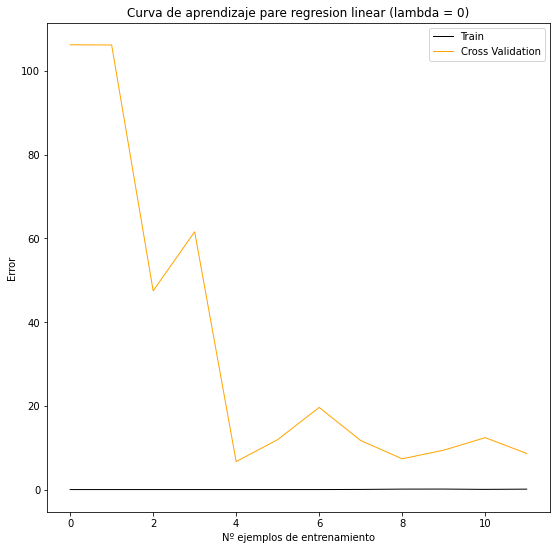

<Figure size 432x288 with 0 Axes>

In [35]:
subconjuntos = np.arange(0,12)
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.plot(subconjuntos,error_t, c='black',linewidth=1,label='Train')
plt.plot(subconjuntos,error_cv, c='orange',linewidth=1,label='Cross Validation')
plt.xlabel('Nº ejemplos de entrenamiento')
plt.ylabel('Error')
plt.title('Curva de aprendizaje pare regresion linear (lambda = 0)')
plt.legend(loc=1)
plt.show()
plt.savefig('p5Fig4.png')

In [36]:
lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

In [37]:
the_ca = []
error_t = []
error_cv = []
Xval1 = np.hstack([np.ones([Xval_norm.shape[0],1]),Xval_norm])
for j, lambd in enumerate(lambdas):
    subconjunto_x = matriz_entrada1[0:j+1]
    subconjunto_y = y[0:j+1]
    tmin = opt.minimize(fun=regresion_linear_regularizada, x0=theta, args=(subconjunto_x, subconjunto_y, lambd),method='TNC',jac=True,options={'maxiter' : 50})
    the_ca.append(tmin['x'])
    error_t.append(coste_rl(matriz_entrada1, y, the_ca[j], lambd))
    error_cv.append(coste_rl(Xval1, yval, the_ca[j], lambd))

<Figure size 432x288 with 0 Axes>

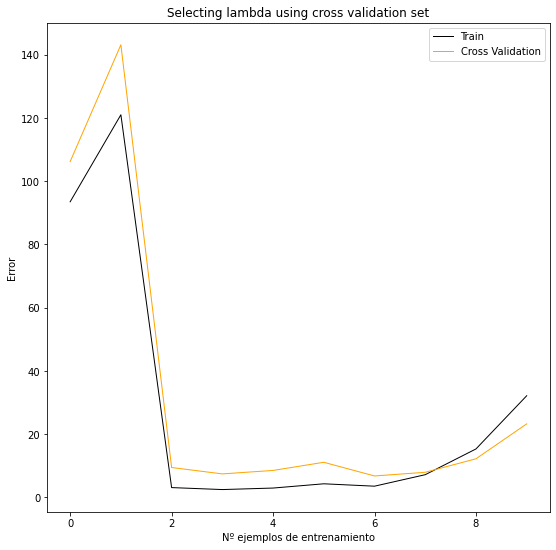

<Figure size 432x288 with 0 Axes>

In [38]:
subconjuntos = np.arange(0,10)
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.plot(subconjuntos,error_t, c='black',linewidth=1,label='Train')
plt.plot(subconjuntos,error_cv, c='orange',linewidth=1,label='Cross Validation')
plt.xlabel('Nº ejemplos de entrenamiento')
plt.ylabel('Error')
plt.title('Selecting lambda using cross validation set')
plt.legend(loc=1)
plt.show()
plt.savefig('p5Fig5.png')